# Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

# sns.reset_orig()
%load_ext autoreload
%autoreload 2

In [2]:
def create_good_df(df):
    emptydf = pd.DataFrame(columns=list(df["Method"].unique()) + ["lastKDays"])
    emptydf

    for l, tempdf in df.groupby("lastKDays"):
        d = {}
        for method, tempdf1 in tempdf.groupby("Method"):
            d[method] = tempdf1["rmse"].mean()
    #     break
        temp = [d.get(col, np.nan) for col in emptydf.columns[:-1]]
        emptydf.loc[emptydf.shape[0]] = temp + [int(l)]

    emptydf['lastKDays'] = emptydf['lastKDays'].astype(int)
    emptydf = emptydf.set_index("lastKDays")
    emptydf = emptydf.rename(columns={"XGBRegressor": "XGB", "KNeighborsRegressor": "KNN"})
    try:
        emptydf.drop(columns=["XGBRFRegressor"], inplace=True)
    except KeyError:
        pass
#     emptydf = emptydf[['GPR', 'XGB', 'KNN','SVR', 'Lasso']]
    return emptydf

In [3]:
from common_functions import latexify, format_axes, tableau20blind
latexify(12, 8)
# latexify(columns=1)

In [4]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 3,
    'legend.fontsize': 14 + 6,
    'legend.framealpha': .6,
    'axes.titlesize': 14 + 6,
    "axes.labelsize": 14 + 6,
    'xtick.labelsize': 14 + 6,
    'ytick.labelsize': 16 + 6,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 3,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

## Beijing A

In [5]:
splits = 6

In [6]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST', 'gpFULL']:
    for loc in ["results", "lastK1"]:
        try:
            odf = pd.read_csv(f"../exp1/src/{loc}/beijinga_scaled/{reg}/final_test.csv")        
            new_temp = odf[odf["is_val_error"] == False]
            lastKDayss = new_temp['lastKDays'].unique()
            for lastKDays in lastKDayss:
                new_temp2 = new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)]
                new_temp3 = new_temp2[new_temp2["time_ix"] >= 29]
                temp.append(new_temp3)
        except Exception as e:
            print(e)
            pass
df = pd.concat(temp)
df.head()

[Errno 2] File b'../exp1/src/lastK1/beijinga_scaled/xgb/final_test.csv' does not exist: b'../exp1/src/lastK1/beijinga_scaled/xgb/final_test.csv'
[Errno 2] File b'../exp1/src/results/beijinga_scaled/xgbRF/final_test.csv' does not exist: b'../exp1/src/results/beijinga_scaled/xgbRF/final_test.csv'
[Errno 2] File b'../exp1/src/lastK1/beijinga_scaled/xgbRF/final_test.csv' does not exist: b'../exp1/src/lastK1/beijinga_scaled/xgbRF/final_test.csv'
[Errno 2] File b'../exp1/src/lastK1/beijinga_scaled/gpST/final_test.csv' does not exist: b'../exp1/src/lastK1/beijinga_scaled/gpST/final_test.csv'
[Errno 2] File b'../exp1/src/results/beijinga_scaled/gpFULL/final_test.csv' does not exist: b'../exp1/src/results/beijinga_scaled/gpFULL/final_test.csv'
[Errno 2] File b'../exp1/src/lastK1/beijinga_scaled/gpFULL/final_test.csv' does not exist: b'../exp1/src/lastK1/beijinga_scaled/gpFULL/final_test.csv'


,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
10,False,Lasso,2,50,0,-1,49,3,17.307314,17.052199
11,False,Lasso,2,50,0,-1,51,0,27.572378,27.176047
12,False,Lasso,2,50,0,-1,53,2,8.492146,7.155122
13,False,Lasso,2,50,0,-1,55,1,59.347461,52.680319
14,False,Lasso,2,50,0,-1,57,2,36.033533,35.738314


In [7]:
temp = {
    "reg": [],
    "time_ix": [],
    "rmse": [],
    "mae": [],
    "kout": [],
}
for called_reg, reg in zip(['IDW', 'Kriging', 'Spatial GP'], ['idw', 'krig', 'spatial_gp']):
    df_rmse = pd.read_csv(f"../exp1/interpol_baselines/{reg}_rmse.csv").T
    df_mae = pd.read_csv(f"../exp1/interpol_baselines/{reg}_mae.csv").T
    for ix, row in enumerate(sorted(df_rmse.index)):
        if ix % 2 == 1:
            continue
        temp["reg"].extend([called_reg] * splits)
        temp["time_ix"].extend([ix] * splits)
        temp["rmse"].extend(list(df_rmse.loc[row][[i for i in range(splits)]]))
        temp["mae"].extend(list(df_mae.loc[row][[i for i in range(splits)]]))
        temp["kout"].extend(list(range(splits)))

values_total = len(temp["reg"])
temp["lastKDays"] = [1] * values_total
temp["is_val_error"] = [False] * values_total
temp["stepSize"] = [2] * values_total
temp["kin"] = [-1] * values_total
temp["kout"] = [-1] * values_total
temp["hy_ix"] = [-1] * values_total
for col in df.columns:
    temp[col]
interpols = pd.DataFrame(temp)[df.columns]
interpols = interpols[interpols["time_ix"] >= 29]
interpols.head()

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
90,False,IDW,2,1,-1,-1,30,-1,3.816993,2.608293
91,False,IDW,2,1,-1,-1,30,-1,4.633654,3.803035
92,False,IDW,2,1,-1,-1,30,-1,4.545861,3.703393
93,False,IDW,2,1,-1,-1,30,-1,4.670935,3.797206
94,False,IDW,2,1,-1,-1,30,-1,3.534897,2.897158


In [8]:
df = df.append(interpols)
df.tail()

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
3217,False,Spatial GP,2,1,-1,-1,356,-1,7.450887,5.665492
3218,False,Spatial GP,2,1,-1,-1,356,-1,9.368780,6.531100
3219,False,Spatial GP,2,1,-1,-1,356,-1,4.476387,3.711090
3220,False,Spatial GP,2,1,-1,-1,356,-1,3.331551,2.931952
3221,False,Spatial GP,2,1,-1,-1,356,-1,5.154004,3.739507


In [9]:
interpols["time_ix"].unique()

array([ 30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,
        56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,
        82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106,
       108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132,
       134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158,
       160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184,
       186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210,
       212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236,
       238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262,
       264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288,
       290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314,
       316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340,
       342, 344, 346, 348, 350, 352, 354, 356])

In [10]:
for nonex, wow in df.groupby(["lastKDays", "reg"]):
    if nonex[0] == 1:
        print(f'{nonex[1]}:')
        print(sorted(list(wow["time_ix"].unique())))

IDW:
[30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356]
KNeighborsRegressor:
[30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 11

In [11]:
# df = df[(df['reg'].isin(["GPR", "SVR", "KNeighborsRegressor", "XGBRegressor", "Lasso"]))  & (df['lastKDays'].isin([10, 20, 30, 50]))]
df = df.rename(columns={"reg": "Method"})
# df.head()

In [12]:
df["Method"].unique()

array(['Lasso', 'KNeighborsRegressor', 'XGBRegressor', 'SVR', 'GPR',
       'SVGP', 'IDW', 'Kriging', 'Spatial GP'], dtype=object)

In [13]:
emptydf = create_good_df(df)
emptydf

,Lasso,KNN,XGB,SVR,GPR,SVGP,IDW,Kriging,Spatial GP
lastKDays,,,,,,,,,
1,16.199408,15.386741,NaN,16.126510,NaN,NaN,16.790679,14.827234,16.35691
10,37.550407,36.151260,16.530471,35.464989,20.234332,NaN,NaN,NaN,NaN
20,43.520893,35.660300,16.590851,40.070962,16.796107,NaN,NaN,NaN,NaN
30,46.102314,35.657574,16.718684,43.620188,16.288170,NaN,NaN,NaN,NaN
50,50.446792,36.765857,17.587178,46.967750,18.677015,50.761396,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,55.813333,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,63.981932,NaN,NaN,NaN


/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


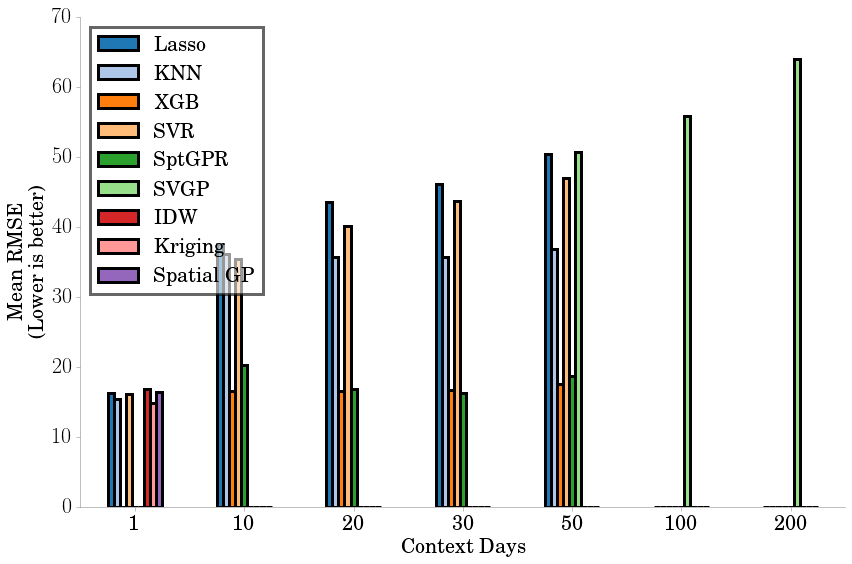

In [14]:
# plt.figure(figsize=(12, 8))
emptydf = emptydf.rename(columns={"GPR": "SptGPR"})
emptydf.plot(kind="bar",rot=0, colors=tableau20blind)
format_axes(plt.gca())
plt.ylabel("Mean RMSE\n(Lower is better)")
plt.xlabel("Context Days")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("plts/lastK1/exp1a.pdf")
plt.show()

In [15]:
df.groupby(["lastKDays", "Method"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays Method                                                       
1         IDW                         False       2.0 -1.000000 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Kriging                     False       2.0 -1.000000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          Spatial GP                  False       2.0 -1.000000 -1.0   
10        GPR                         False       2.0  2.522655 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.494565 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.515385 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        GPR                         False       2.0  2.549941 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
100       SVGP                        False       2.0  2.500000 -1.0   
200       SVGP                        False       2.0  2.500000 -1.0   

                                  time_ix     hy_ix       rmse        mae  
lastKDays Method                                                           
1         IDW                  193.000000 -1.000000  16.790679  13.003668  
          KNeighborsRegressor  193.000000  2.337398  15.386741  11.973964  
          Kriging              193.000000 -1.000000  14.827234  11.537678  
          Lasso                193.000000  1.957317  16.199408  12.823304  
          SVR                  193.000000  3.893293  16.126510  12.354261  
          Spatial GP           193.000000 -1.000000  16.356910  12.607657  
10        GPR                  194.850369 -1.000000  20.234332  16.865000  
          KNeighborsRegressor  193.000000  3.020202  36.151260  32.160961  
          Lasso                193.000000  1.520202  37.550407  33.861817  
          SVR                  193.000000  4.150505  35.464989  31.510560  
          XGBRegressor         193.000000  4.567677  16.530471  12.826442  
20        GPR                  193.873913 -1.000000  16.796107  13.413240  
          KNeighborsRegressor  193.000000  3.087879  35.660300  31.503581  
          Lasso                193.000000  1.520202  43.520893  39.855778  
          SVR                  193.000000  3.907071  40.070962  36.154395  
          XGBRegressor         193.000000  4.927273  16.590851  12.827891  
30        GPR                  192.419780 -1.000000  16.288170  12.894913  
          KNeighborsRegressor  193.000000  3.066667  35.657574  31.501660  
          Lasso                193.000000  1.426263  46.102314  42.446780  
          SVR                  193.000000  3.688889  43.620188  39.738064  
          XGBRegressor         193.000000  5.075758  16.718684  12.983616  
50        GPR                  203.277321 -1.00000

In [21]:
for ix, tempdf in df.groupby(["lastKDays", "Method"]):
    try:
        print(ix, tempdf["rmse"].std())
    except Exception as e:
        print (e)

(1, 'IDW') 16.046418274255767
(1, 'KNeighborsRegressor') 14.650523419812679
(1, 'Kriging') 14.052942871773537
(1, 'Lasso') 14.989115516113422
(1, 'SVR') 15.765921706052422
(1, 'Spatial GP') 16.440296783081997
(10, 'GPR') 29.24326305055514
(10, 'KNeighborsRegressor') 29.05635770648613
(10, 'Lasso') 29.41914285088496
(10, 'SVR') 33.18245511957654
(10, 'XGBRegressor') 16.1082378379277
(20, 'GPR') 20.357784736236397
(20, 'KNeighborsRegressor') 28.071568632434627
(20, 'Lasso') 33.950316923797516
(20, 'SVR') 39.3226129808007
(20, 'XGBRegressor') 15.823542407150335
(30, 'GPR') 17.68207925559649
(30, 'KNeighborsRegressor') 28.07053653298851
(30, 'Lasso') 36.27358270734533
(30, 'SVR') 42.65828314024753
(30, 'XGBRegressor') 15.711951973102652
(50, 'GPR') 20.59573713835815
(50, 'KNeighborsRegressor') 28.446271608339167
(50, 'Lasso') 38.91452218927904
(50, 'SVGP') 36.63362535640055
(50, 'SVR') 44.82228439925662
(50, 'XGBRegressor') 16.627289363737106
(100, 'SVGP') 40.541820014323164
(200, 'SVGP') 

## Beijing B

In [ ]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST', 'gpFULL']:
    try:
        odf = pd.read_csv(f"../exp1/src/results/beijingb_scaled/{reg}/final_test.csv")        
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            temp.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except Exception as e:
        print(e)
        pass
df = pd.concat(temp)
# df = df.append(interpols)
# df = df[~(df['reg'] == "SVGP") & ~(df['lastKDays'].isin([1, 100, 200]))]
df = df.rename(columns={"reg": "Method"})
emptydf = create_good_df(df)
emptydf

# plt.figure(figsize=(12, 8))
# sns.barplot(data=df, x = "lastKDays", y="rmse", hue="Method", errwidth=0)
# plt.ylabel("RMSE")
# plt.xlabel("Number of days used as context")
# plt.title(f"Average Test Performances Using Nested Cross Validation on Beijing B.")

In [ ]:
plt.figure(figsize=(12, 8))
emptydf = emptydf.rename(columns={"GPR": "Our GPR"})
emptydf.plot(kind="bar",rot=0)#, colors=tableau20blind)
format_axes(plt.gca())
plt.ylabel("Mean RMSE\n(Lower is better)")
plt.xlabel("Context Days")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("plts/lastK1/exp1b.pdf")
plt.show()

In [ ]:
df.groupby(["lastKDays", "Method"]).mean()

In [ ]:
df.groupby(["lastKDays", "Method",]).std()